In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

### Neural Networks

MLP (Multilayer perceptron) regression

In [7]:
df_prepared = pd.read_csv('df_prepared.csv')

X = df_prepared.drop(columns=['price'])
y = df_prepared['price']

In [8]:
# Padalijame į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame polinominius požymius
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sukuriame MLP regresorių su hiperparametrų paieška
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_regressor = MLPRegressor(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

# Geriausi parametrai
best_params = grid_search.best_params_
print(f'Geriausi parametrai: {best_params}')

# Geriausias modelis
best_model = grid_search.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# Vertiname modelį
train_mse_mlp = mean_squared_error(y_train, y_train_pred)
test_mse_mlp = mean_squared_error(y_test, y_test_pred)
train_r2_mlp = r2_score(y_train, y_train_pred)
test_r2_mlp = r2_score(y_test, y_test_pred)


/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site

KeyboardInterrupt: 

/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site

Geriausi parametrai: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulius/.local/lib/python3.10/site

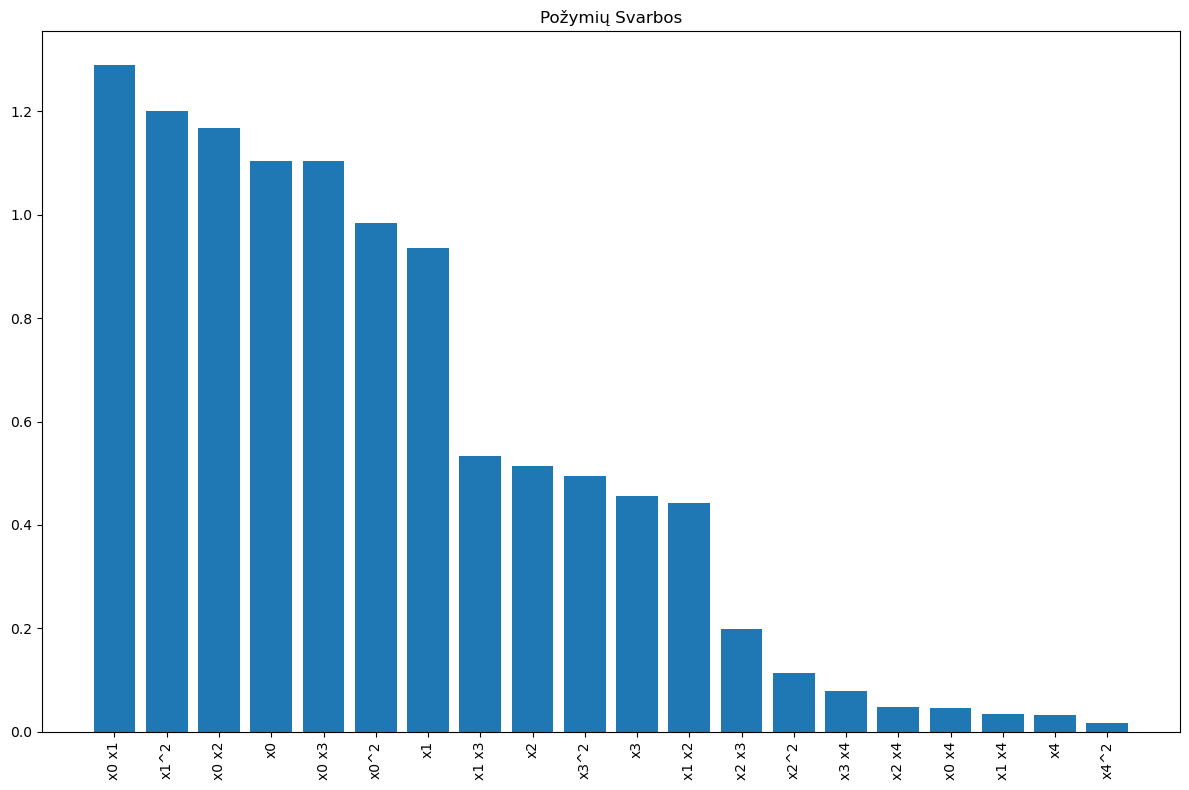

Treniravimo MSE: 464.7176160755923
Testavimo MSE: 545.4295758562384
Treniravimo R2: 0.884110994924874
Testavimo R2: 0.8662082783596107
Kryžminės validacijos (cv=5) R2 reikšmės: [0.85176002 0.82392136 0.78930423 0.83980313 0.83421568]
Kryžminės validacijos (cv=5) vidutinis R2: 0.8278008843444077
Kryžminės validacijos (cv=10) R2 reikšmės: [0.8671316  0.85424216 0.81737051 0.85379004 0.85126744 0.72616487
 0.81381425 0.82945006 0.8378498  0.83734636]
Kryžminės validacijos (cv=10) vidutinis R2: 0.8288427089834967


In [10]:
# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame polinominius požymius
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sukuriame MLP regresorių su hiperparametrų paieška
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_regressor = MLPRegressor(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

# Geriausi parametrai
best_params = grid_search.best_params_
print(f'Geriausi parametrai: {best_params}')

# Geriausias modelis
best_model = grid_search.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# Vertiname modelį
train_mse_mlp = mean_squared_error(y_train, y_train_pred)
test_mse_mlp = mean_squared_error(y_test, y_test_pred)
train_r2_mlp = r2_score(y_train, y_train_pred)
test_r2_mlp = r2_score(y_test, y_test_pred)



# Kryžminė validacija su pilnu duomenų rinkiniu
cv_scores_5 = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_train_poly, y_train, cv=10, scoring='r2')

# Požymių svarbos vertinimas
result = permutation_importance(best_model, X_test_poly, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Požymių svarbos vizualizacija
features = poly.get_feature_names_out()
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Požymių Svarbos")
plt.bar(range(X_test_poly.shape[1]), importance[indices], align="center")
plt.xticks(range(X_test_poly.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print(f'Treniravimo MSE: {train_mse_mlp}')
print(f'Testavimo MSE: {test_mse_mlp}')
print(f'Treniravimo R2: {train_r2_mlp}')
print(f'Testavimo R2: {test_r2_mlp}')

print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_5.mean()}')

print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_10.mean()}')


In [11]:
results_df = pd.DataFrame({
    'Metric': ['MSE', 'R2'],
    'Train': [train_mse_mlp, train_r2_mlp],
    'Test': [test_mse_mlp, test_r2_mlp]
})

results_df.to_csv('03_model_performance.csv', index=False)

In [ ]:
# reiktu pasididinti mse max_iter iki 1500

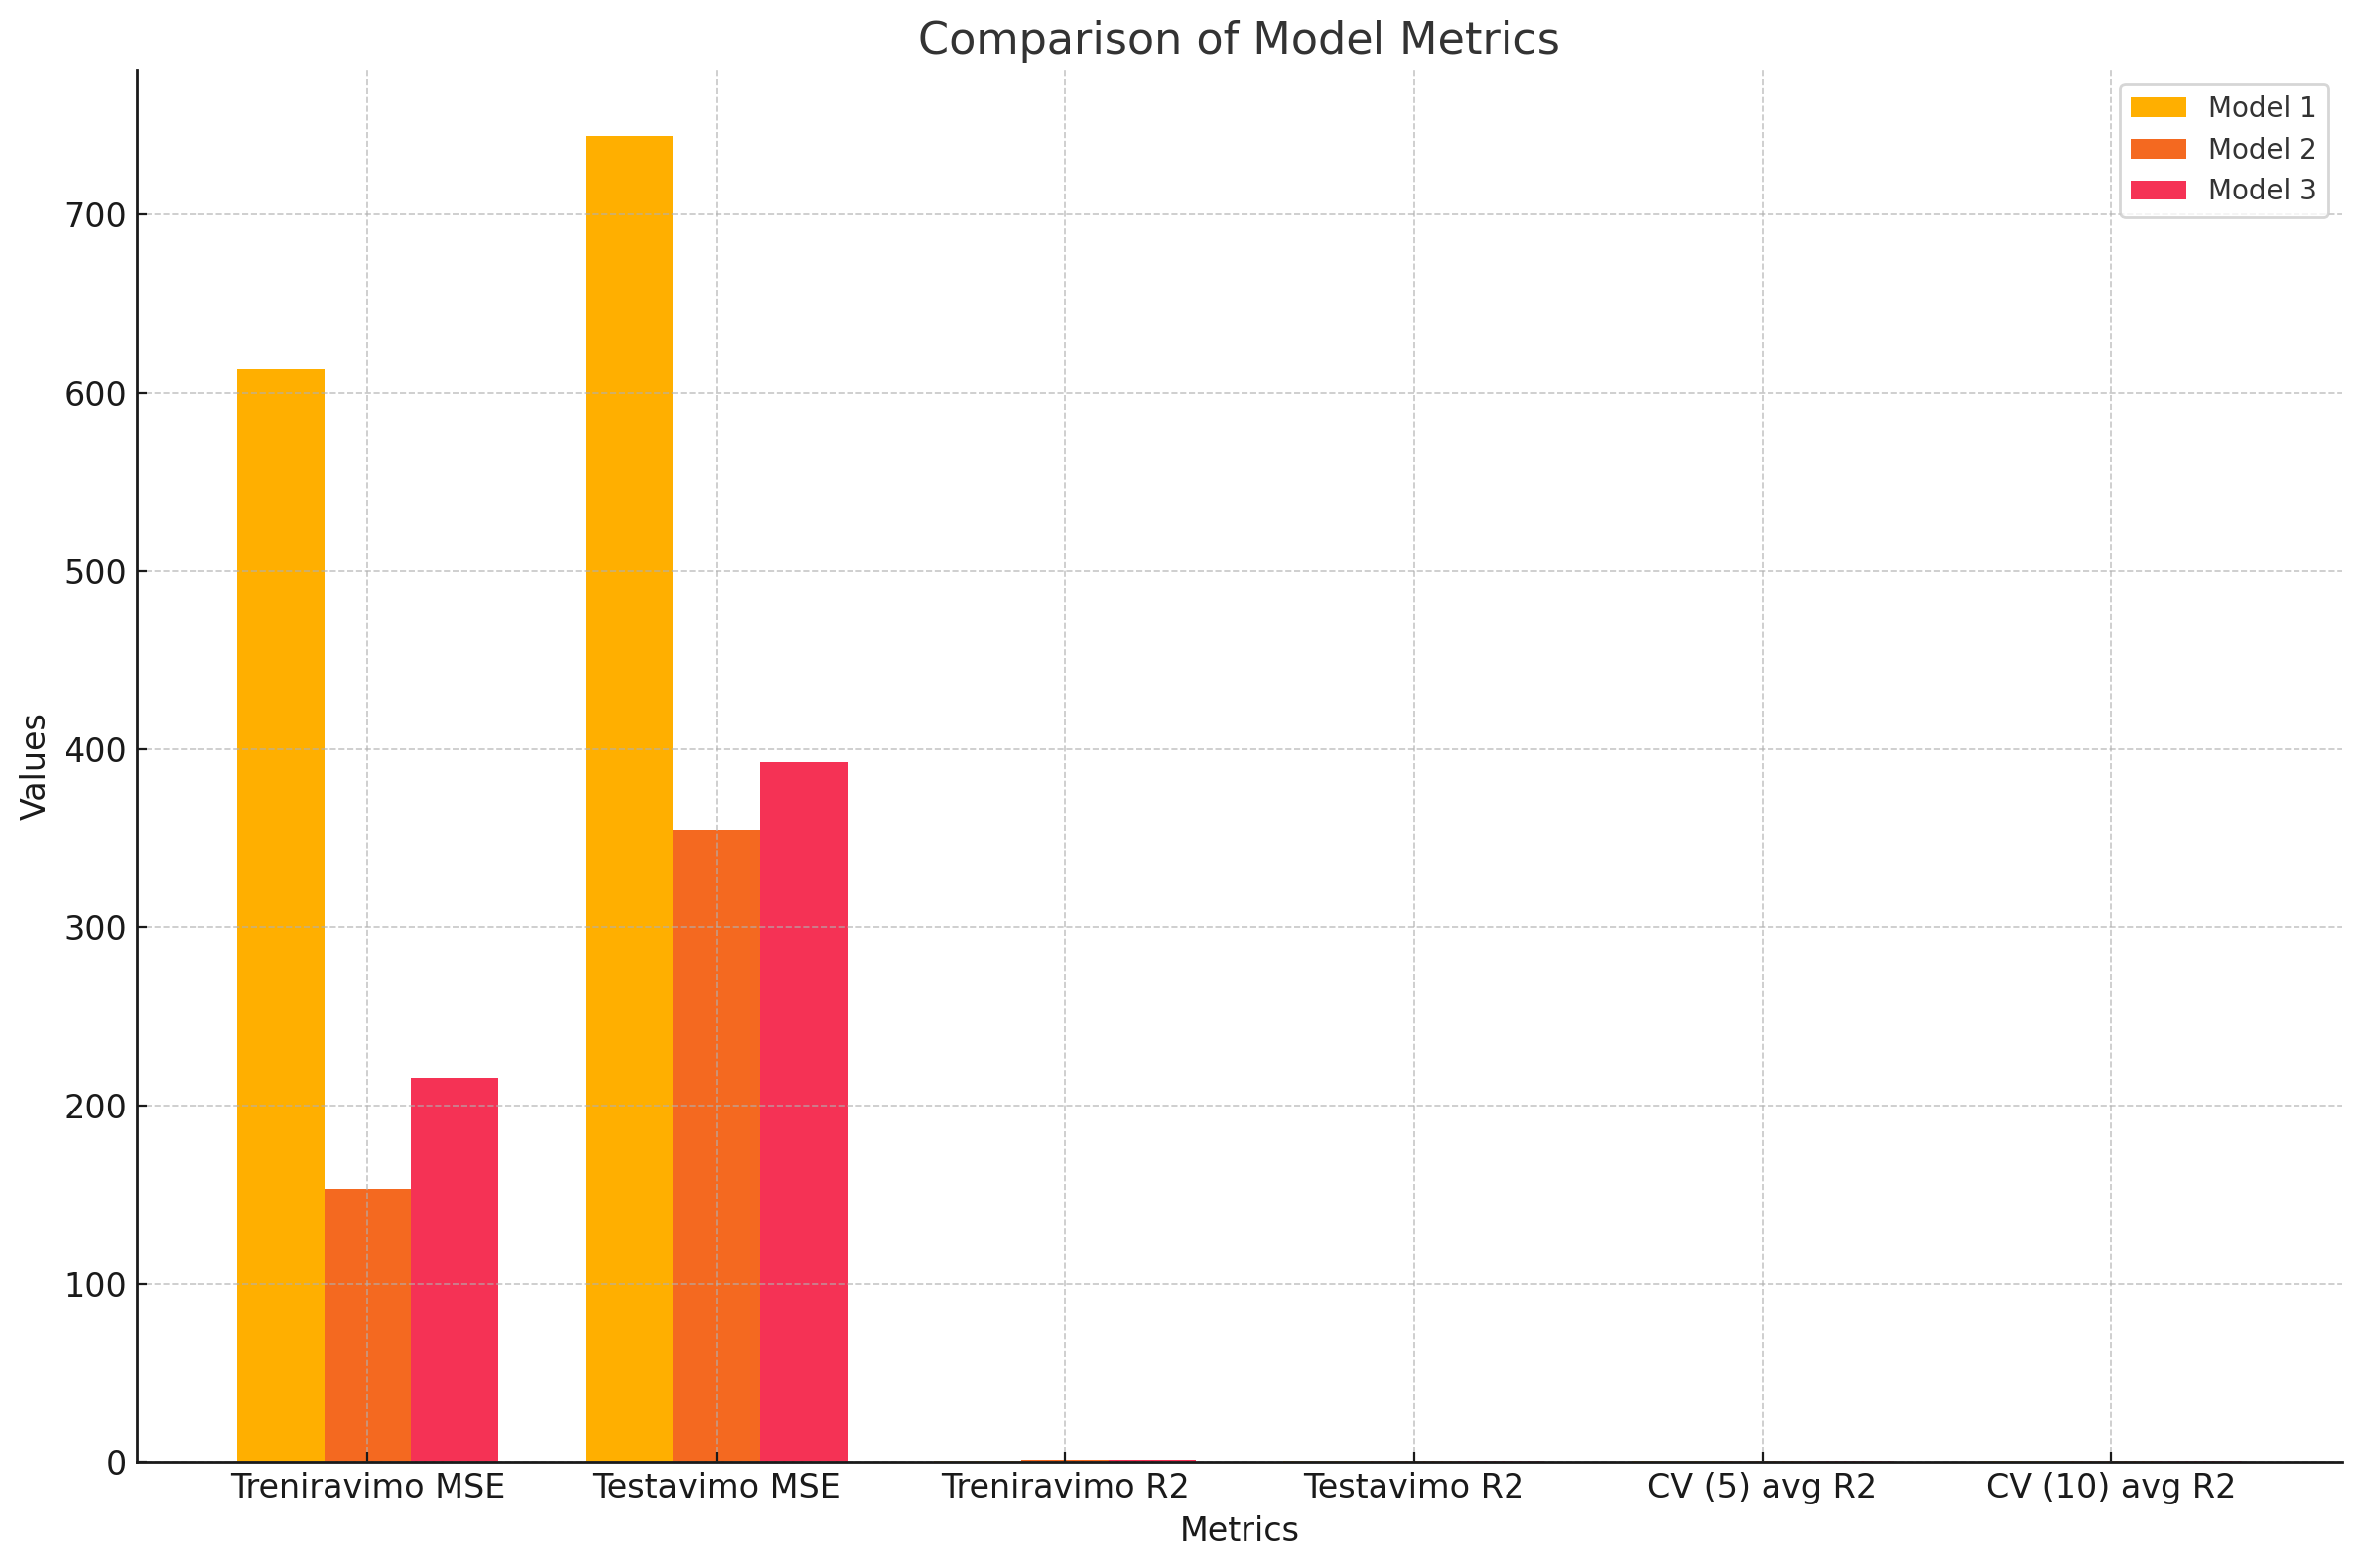

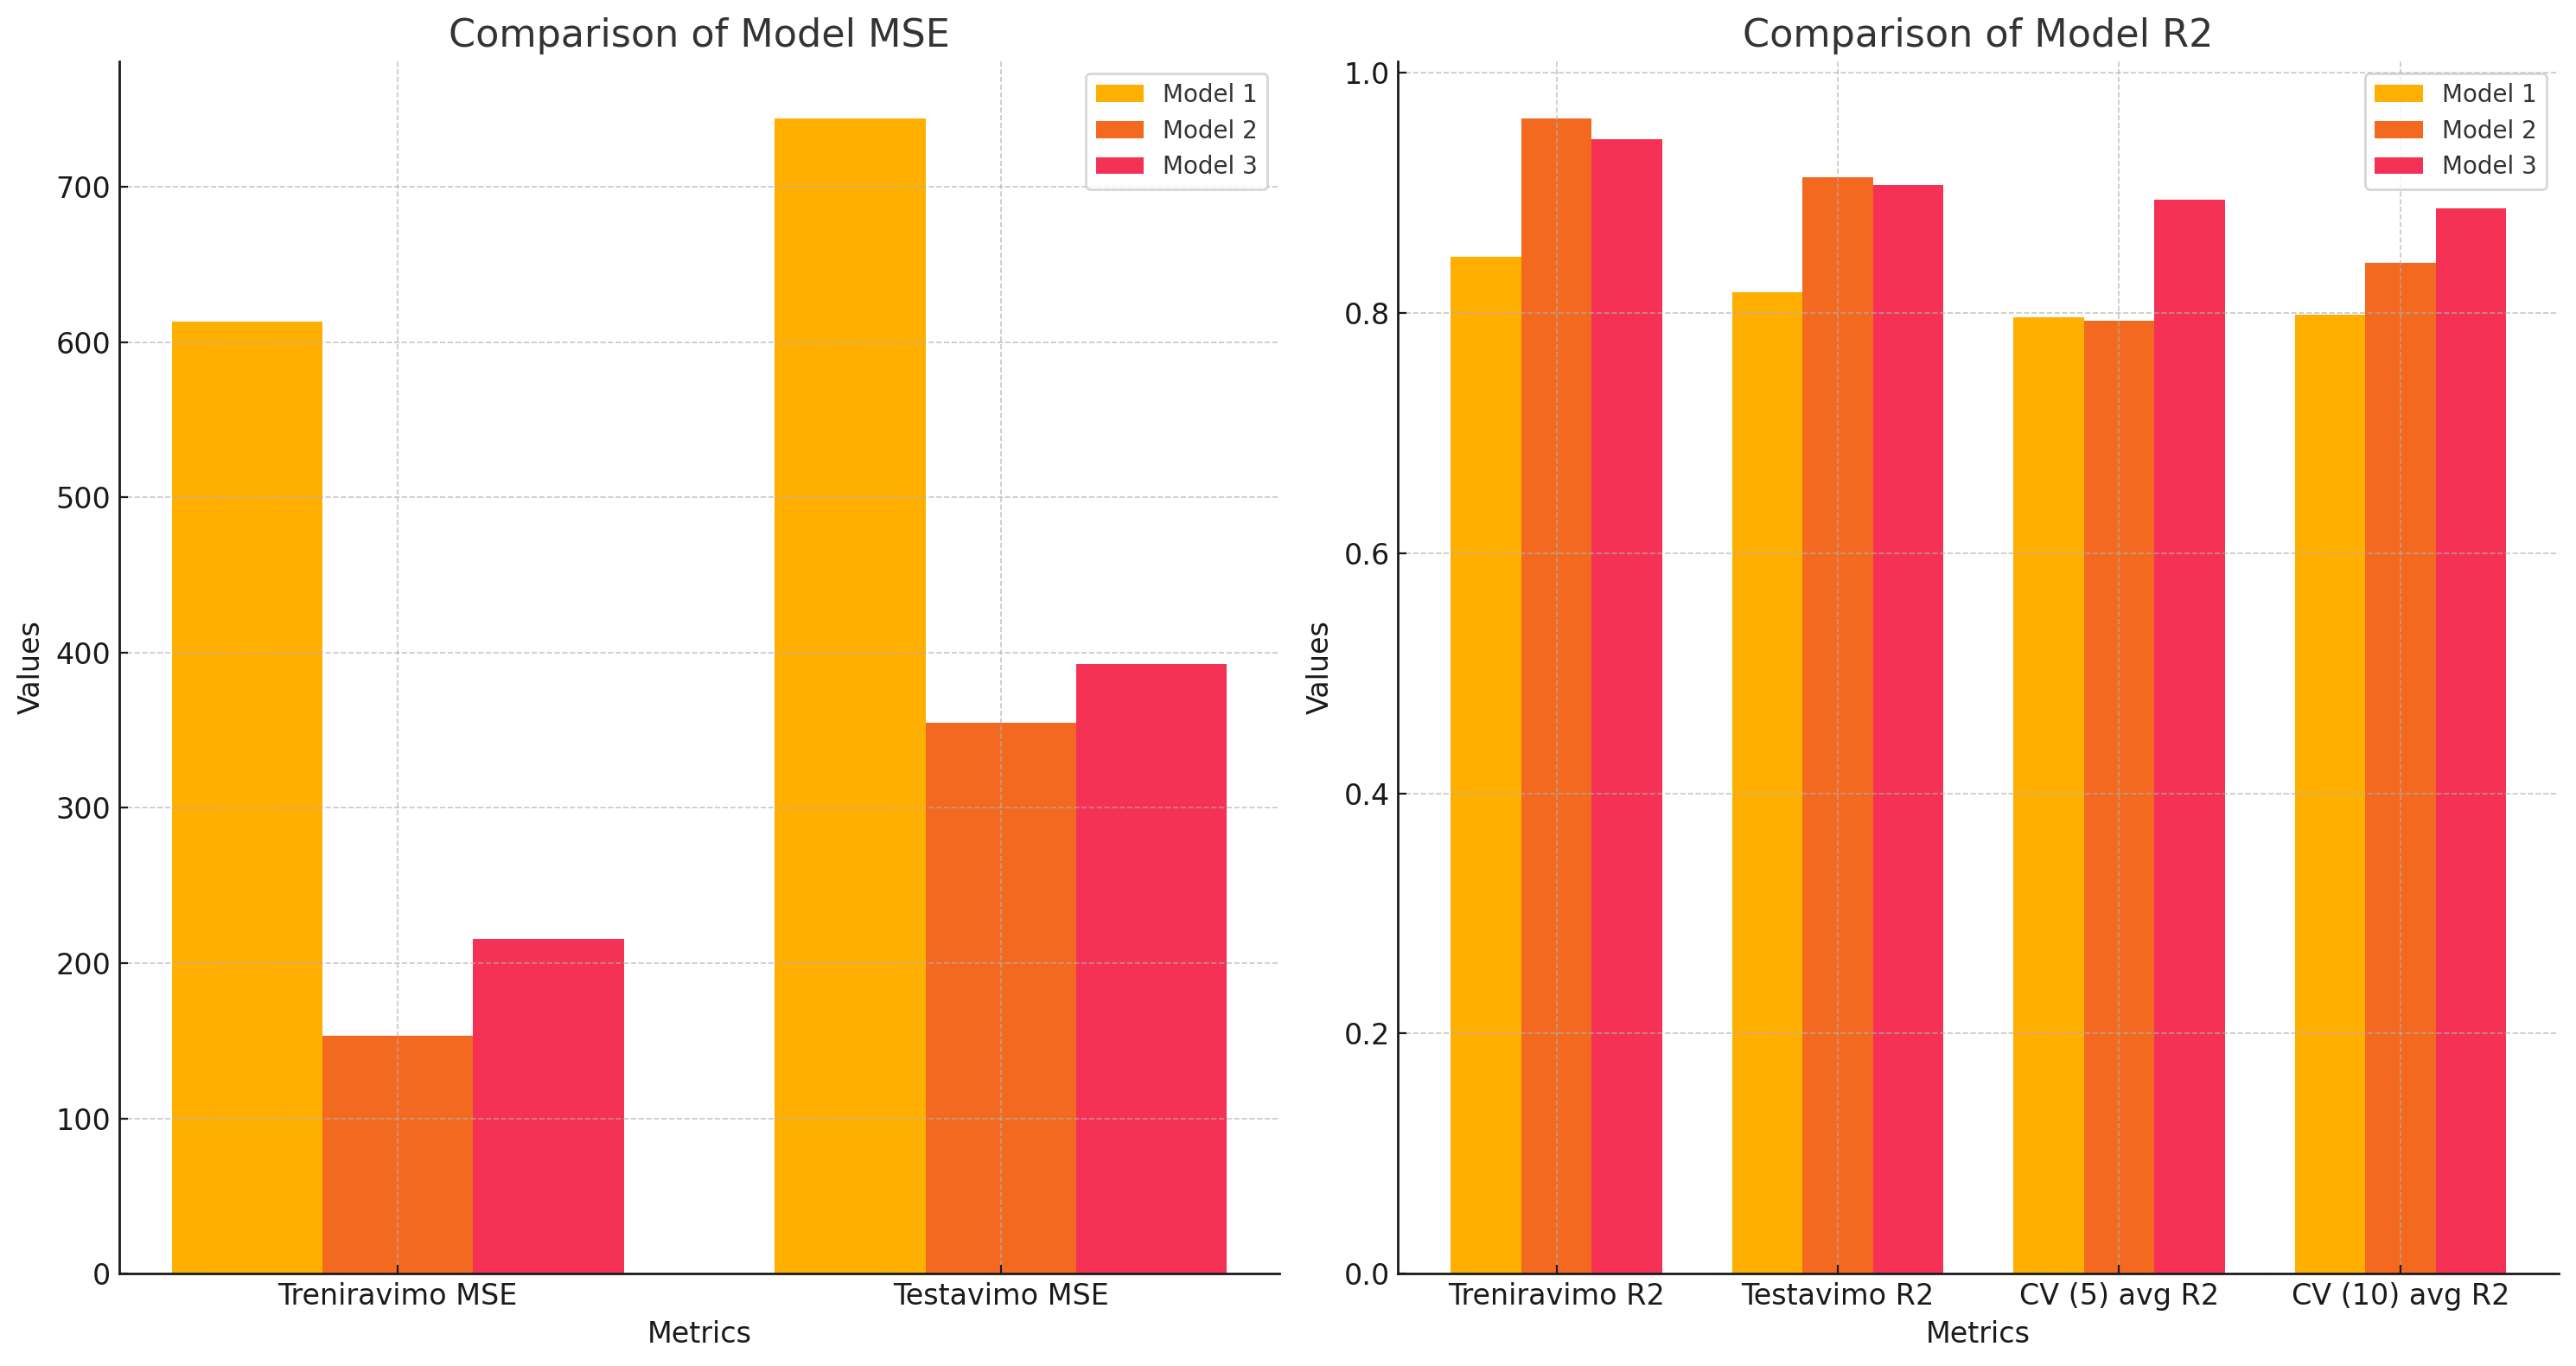

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for MSE and R2 histograms
labels_mse = ['Treniravimo MSE', 'Testavimo MSE']
labels_r2 = ['Treniravimo R2', 'Testavimo R2', 'CV (5) avg R2', 'CV (10) avg R2']

# Values for first model
mse_model1 = [613.3664893930272, 743.698015525763]
r2_model1 = [0.8470416662866116, 0.817573812858365, 0.7965153885271516, 0.7983001191018728]

# Values for second model (Random Forest Regressor with best params)
mse_model2 = [153.24577765012015, 354.7368932652083]
r2_model2 = [0.9617843178534734, 0.9129844405580515, 0.7935084262448825, 0.8417489529469163]

# Values for third model (Random Forest Regressor with different params)
mse_model3 = [215.80573020353043, 392.60763728321365]
r2_model3 = [0.9451766230440743, 0.9064511063695795, 0.8945011844630677, 0.8874013555347526]

x_mse = np.arange(len(labels_mse))  # the label locations for MSE
x_r2 = np.arange(len(labels_r2))  # the label locations for R2
width = 0.25  # the width of the bars

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plotting MSE bar chart
rects1_mse = axes[0].bar(x_mse - width, mse_model1, width, label='Model 1')
rects2_mse = axes[0].bar(x_mse, mse_model2, width, label='Model 2')
rects3_mse = axes[0].bar(x_mse + width, mse_model3, width, label='Model 3')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Values')
axes[0].set_title('Comparison of Model MSE')
axes[0].set_xticks(x_mse)
axes[0].set_xticklabels(labels_mse)
axes[0].legend()

# Plotting R2 bar chart
rects1_r2 = axes[1].bar(x_r2 - width, r2_model1, width, label='Model 1')
rects2_r2 = axes[1].bar(x_r2, r2_model2, width, label='Model 2')
rects3_r2 = axes[1].bar(x_r2 + width, r2_model3, width, label='Model 3')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Values')
axes[1].set_title('Comparison of Model R2')
axes[1].set_xticks(x_r2)
axes[1].set_xticklabels(labels_r2)
axes[1].legend()

fig.tight_layout()
plt.show()


In [ ]:
# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram for train MSE
axes[0, 0].hist(train_mse_rfr, bins='auto', alpha=0.5, label='Random Forest')
axes[0, 0].hist(train_mse, bins='auto', alpha=0.5, label='Second Set')
axes[0, 0].hist(train_mse_mlp, bins='auto', alpha=0.5, label='MLP')
axes[0, 0].set_title('Train MSE Comparison')
axes[0, 0].set_xlabel('MSE')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend(loc='best')

# Histogram for test MSE
axes[0, 1].hist(test_mse_rfr, bins='auto', alpha=0.5, label='Random Forest')
axes[0, 1].hist(test_mse, bins='auto', alpha=0.5, label='Second Set')
axes[0, 1].hist(test_mse_mlp, bins='auto', alpha=0.5, label='MLP')
axes[0, 1].set_title('Test MSE Comparison')
axes[0, 1].set_xlabel('MSE')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend(loc='best')

# Histogram for train R²
axes[1, 0].hist(train_r2_rfr, bins='auto', alpha=0.5, label='Random Forest')
axes[1, 0].hist(train_r2, bins='auto', alpha=0.5, label='Second Set')
axes[1, 0].hist(train_r2_mlp, bins='auto', alpha=0.5, label='MLP')
axes[1, 0].set_title('Train R² Comparison')
axes[1, 0].set_xlabel('R²')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(loc='best')

# Histogram for test R²
axes[1, 1].hist(test_r2_rfr, bins='auto', alpha=0.5, label='Random Forest')
axes[1, 1].hist(test_r2, bins='auto', alpha=0.5, label='Second Set')
axes[1, 1].hist(test_r2_mlp, bins='auto', alpha=0.5, label='MLP')
axes[1, 1].set_title('Test R² Comparison')
axes[1, 1].set_xlabel('R²')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

POZYMIAI: 

review quantity  
score  
price  








gintarevcs@gmail.com 860547452.

tada su UI duoti susivesti duomenis, kad jam nuspetu kada jam geriausia kainos pasiulyma, jei tuo laikotarpiu nuomotusi. linearregsesion - ten yra ui vz. 




In [ ]:
# tkinter as tk - yra UI, kad vartotojas isivestu duomenis ir nereitku su input zaisti.